In [3]:
import torch
import torch.version

print(torch.__version__)
print(torch.version.cuda)

2.3.1
12.1


In the following we will use a dataset provided in the dataset collection of PyTorch Geometric ([Here you find all datasets](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html)). The Dataset comes from the MoleculeNet collection, which can be found [here](http://moleculenet.ai/datasets-1).


>"ESOL is a small dataset consisting of water solubility data for 1128 compounds. The dataset
has been used to train models that estimate solubility directly from chemical structures (as
encoded in SMILES strings). Note that these structures don’t include 3D coordinates, since
solubility is a property of a molecule and not of its particular conformers."

**>>> Machine Learning task: How are different molecules dissolving in water?**


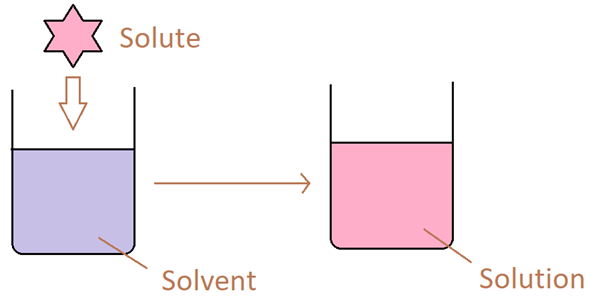

Source: https://www.differencebetween.com/difference-between-solubility-and-solubility-product/

[link text](https://)### SMILES representation and important sidenodes

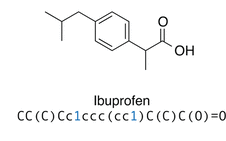
 
 Source: https://medium.com/@sunitachoudhary103/generating-molecules-using-a-char-rnn-in-pytorch-16885fd9394b

- Using the plain SMILES string as input is not suitable
- This will not consider the molecule structure but rather the grammar of the SMILES string
- The SMILES string can be different for a molecule, depending on the notation ( a unique molecule can have multiple SMILES strings )
- Chemical graphs however, are invariant to permutations --> Graph Neural Networks

In [1]:
import rdkit
from torch_geometric.datasets import MoleculeNet
 
# Load the ESOL dataset
data = MoleculeNet(root=".", name="ESOL")
data

ESOL(1128)

### Data Exploration

In [2]:
print("Dataset type: ", type(data))
print("Dataset features: ", data.num_features)
print("Dataset target: ", data.num_classes)
print("Dataset length: ", data.len)
print("Dataset sample: ", data[0])
print("Sample nodes: ", data[0].num_nodes)
print("Sample edges: ", data[0].num_edges)

Dataset type:  <class 'torch_geometric.datasets.molecule_net.MoleculeNet'>
Dataset features:  9
Dataset target:  734
Dataset length:  <bound method InMemoryDataset.len of ESOL(1128)>
Dataset sample:  Data(x=[32, 9], edge_index=[2, 68], edge_attr=[68, 3], smiles='OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O ', y=[1, 1])
Sample nodes:  32
Sample edges:  68


/home/niranjan/miniconda3/envs/gnn/lib/python3.9/site-packages/torch_geometric/data/dataset.py:169: UserWarning: Found floating-point labels while calling `dataset.num_classes`. Returning the number of unique elements. Please make sure that this is expected before proceeding.
  warnings.warn("Found floating-point labels while calling "


In [3]:
# investigating the node feature
# shape: [num_nodes, num_node_features]
data[0].x

tensor([[8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 0],
        [6, 0, 2, 5, 0, 0, 2, 0, 0],
        [7, 0, 1, 5, 0, 0, 2, 0, 0],
        [6, 0, 3, 5, 0, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
 

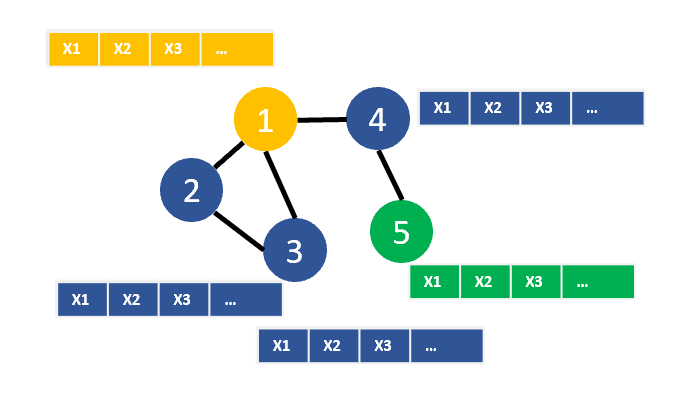

In [5]:
# investigating the edges in sparse COO format
# shape: [2, num_edges]
data[0].edge_index.t()

tensor([[ 0,  1],
        [ 1,  0],
        [ 1,  2],
        [ 2,  1],
        [ 2,  3],
        [ 2, 30],
        [ 3,  2],
        [ 3,  4],
        [ 4,  3],
        [ 4,  5],
        [ 4, 26],
        [ 5,  4],
        [ 5,  6],
        [ 6,  5],
        [ 6,  7],
        [ 7,  6],
        [ 7,  8],
        [ 7, 24],
        [ 8,  7],
        [ 8,  9],
        [ 9,  8],
        [ 9, 10],
        [ 9, 20],
        [10,  9],
        [10, 11],
        [11, 10],
        [11, 12],
        [11, 14],
        [12, 11],
        [12, 13],
        [13, 12],
        [14, 11],
        [14, 15],
        [14, 19],
        [15, 14],
        [15, 16],
        [16, 15],
        [16, 17],
        [17, 16],
        [17, 18],
        [18, 17],
        [18, 19],
        [19, 14],
        [19, 18],
        [20,  9],
        [20, 21],
        [20, 22],
        [21, 20],
        [22, 20],
        [22, 23],
        [22, 24],
        [23, 22],
        [24,  7],
        [24, 22],
        [24, 25],
        [2

In [6]:
data[0].y

tensor([[-0.7700]])

In the following we will perform predictions based on the graph level. This means we have one y-label for the whole graph, as shown on the left image below. The right image would be node-level-predictions.

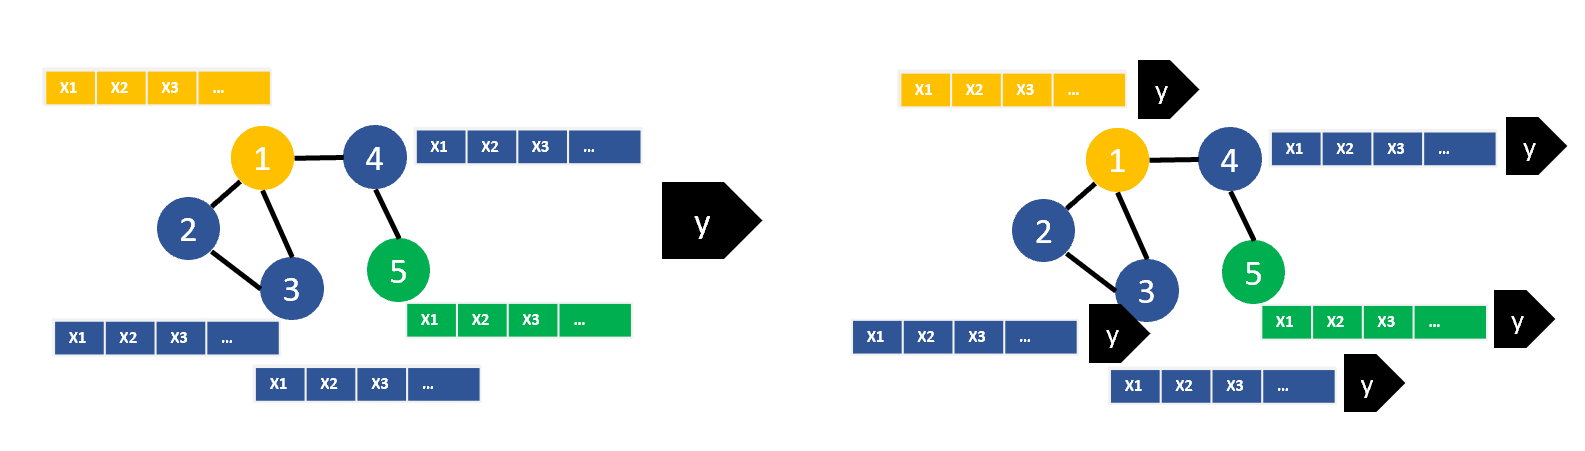

In [26]:
sample_index = 2
print("Dataset sample: ", data[sample_index])
print("Sample nodes: ", data[sample_index].num_nodes)
print("Sample edges: ", data[sample_index].num_edges)

Dataset sample:  Data(x=[11, 9], edge_index=[2, 20], edge_attr=[20, 3], smiles='CC(C)=CCCC(C)=CC(=O)', y=[1, 1])
Sample nodes:  11
Sample edges:  20


### Converting SMILES to RDKit molecules - Visualizing molecules

In [7]:
data[0]["smiles"]

'OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O '

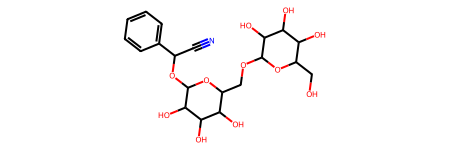

In [8]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
molecule = Chem.MolFromSmiles(data[0]["smiles"])
molecule

In [9]:
type(molecule)

rdkit.Chem.rdchem.Mol

- We can also obtain the features from this RDKit representation
- It tells us everything we need to know e.g. atom features (type, ...), edges, ... 
- **In our case however, It's even easier as we have the information explicitly given already in the dataset**
- Otherwise we would calculate the node features from those atom properties

-> For datasets containing SMILES representations this would be the way to go

### Implementing the Graph Neural Network

Building a Graph Neural Network works the same way as building a Convolutional Neural Network, we simple add some layers.

The GCN simply extends torch.nn.Module.
GCNConv expects:
- in_channels = Size of each input sample.
- out_channels = Size of each output sample.

We apply three convolutional layers, which means we learn the information about 3 neighbor hops. After that we apply a pooling layer to combine the information of the individual nodes, as we want to perform graph-level prediction.

Always keep in mind that different learning problems (node, edge or graph prediction) require different GNN architectures.

For example for node-level prediction you will often encounter masks. For graph-level predictions on the other hand you need to combine the node embeddings.

In [11]:
import torch 
from torch.nn import Linear 
import torch.nn.functional as F 
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp 

EMBEDDING_SIZE = 64

class GCN(torch.nn.Module):
    def __init__(self):
        # init parent
        super(GCN, self).__init__()
        torch.manual_seed(42)

        # GCN layers
        self.initial_conv = GCNConv(data.num_features, EMBEDDING_SIZE)
        self.conv1 = GCNConv(EMBEDDING_SIZE, EMBEDDING_SIZE)
        self.conv2 = GCNConv(EMBEDDING_SIZE, EMBEDDING_SIZE)
        self.conv3 = GCNConv(EMBEDDING_SIZE, EMBEDDING_SIZE)

        # Ouput layer
        self.out = Linear(EMBEDDING_SIZE * 2, 1)

    def forward(self, x, edge_index, batch_index):
        # first conv layer
        hidden = self.initial_conv(x, edge_index)
        hidden = F.tanh(hidden)

        # other conv layers
        hidden = self.conv1(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv2(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv3(hidden, edge_index)
        hidden = F.tanh(hidden)

        # global pooling(stack different aggregations)
        hidden = torch.cat([gmp(hidden, batch_index), 
                            gap(hidden, batch_index)], dim=1)
        
        # apply a final (linear) classifier
        out = self.out(hidden)

        return out, hidden

In [12]:
model = GCN()
print(model)
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

GCN(
  (initial_conv): GCNConv(9, 64)
  (conv1): GCNConv(64, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  13249


- We could also reduce the embeddings, but as we have large molecules we use 64
- The more layers we add, the more information we get about the graph
- For the regression problem we use a Linear layer as final output layer
- We try to use not too many parameters, as we only have ~1k samples

### Training the GNN

In [14]:
from torch_geometric.data import DataLoader
import warnings
warnings.filterwarnings("ignore")

# root mean squared error
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)

# use GPU for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# wrap data in a data loader
data_size = len(data)
NUM_GRAPHS_PER_BATCH = 64
loader = DataLoader(data[:int(data_size * 0.8)], 
                    batch_size = NUM_GRAPHS_PER_BATCH, shuffle=True)

test_loader = DataLoader(data[int(data_size * 0.8): ], batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

In [17]:
for batch in loader:
    print(batch)
    break

DataBatch(x=[913, 9], edge_index=[2, 1880], edge_attr=[1880, 3], smiles=[64], y=[64, 1], batch=[913], ptr=[65])


In [20]:
def train():
    # enumerate over the data
    for batch in loader:
        batch.to(device)
        # reset gradients
        optimizer.zero_grad()
        # passing hte node features and the connection info
        pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)
        # calculating the loss and gradients
        loss = loss_fn(pred, batch.y)
        loss.backward()
        # update using the gradients
        optimizer.step()
    
    return loss, embedding 

In [21]:
print("starting training")
losses = []
for epoch in range(2000):
    loss, h = train()
    losses.append(loss)
    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Train Loss {loss}")


starting training
Epoch 0 | Train Loss 13.998751640319824
Epoch 100 | Train Loss 1.3538243770599365
Epoch 200 | Train Loss 0.7628633379936218
Epoch 300 | Train Loss 0.23273292183876038
Epoch 400 | Train Loss 0.39763960242271423
Epoch 500 | Train Loss 1.1313116550445557
Epoch 600 | Train Loss 0.31691259145736694
Epoch 700 | Train Loss 0.06599731743335724
Epoch 800 | Train Loss 0.07265663146972656
Epoch 900 | Train Loss 0.08741214126348495
Epoch 1000 | Train Loss 0.1798911988735199
Epoch 1100 | Train Loss 0.06462115794420242
Epoch 1200 | Train Loss 0.0274931900203228
Epoch 1300 | Train Loss 0.026492279022932053
Epoch 1400 | Train Loss 0.039230309426784515
Epoch 1500 | Train Loss 0.011555122211575508
Epoch 1600 | Train Loss 0.40980443358421326
Epoch 1700 | Train Loss 0.09526624530553818
Epoch 1800 | Train Loss 0.06666054576635361
Epoch 1900 | Train Loss 0.05842127650976181


### Visualizing the training loss

<Axes: >

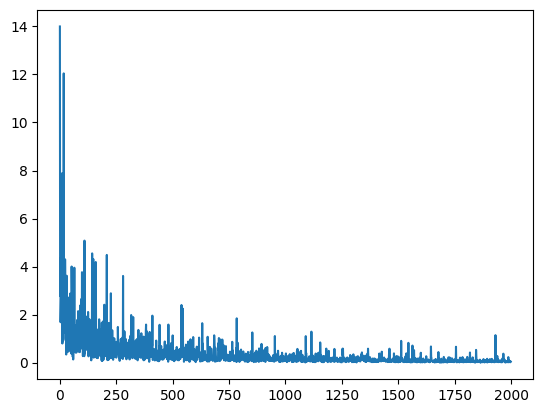

In [23]:
# Visualize learning (training loss)
import seaborn as sns
losses_float = [float(loss.cpu().detach().numpy()) for loss in losses] 
loss_indices = [i for i,l in enumerate(losses_float)] 
plt = sns.lineplot(losses_float)
plt

### Getting a test prediction

In [24]:
import pandas as pd 

# Analyze the results for one batch
test_batch = next(iter(test_loader))
with torch.no_grad():
    test_batch.to(device)
    pred, embed = model(test_batch.x.float(), test_batch.edge_index, test_batch.batch) 
    df = pd.DataFrame()
    df["y_real"] = test_batch.y.tolist()
    df["y_pred"] = pred.tolist()
df["y_real"] = df["y_real"].apply(lambda row: row[0])
df["y_pred"] = df["y_pred"].apply(lambda row: row[0])
df

,y_real,y_pred
0,-2.570,-2.152113
1,-1.470,-1.046858
2,-5.410,-3.759859
3,0.610,-0.481537
4,-5.230,-4.154027
...,...,...
59,-1.920,-2.236713
60,-4.230,-3.779945
61,-4.554,-2.411223
62,-1.960,-1.688365


<Axes: xlabel='y_real', ylabel='y_pred'>

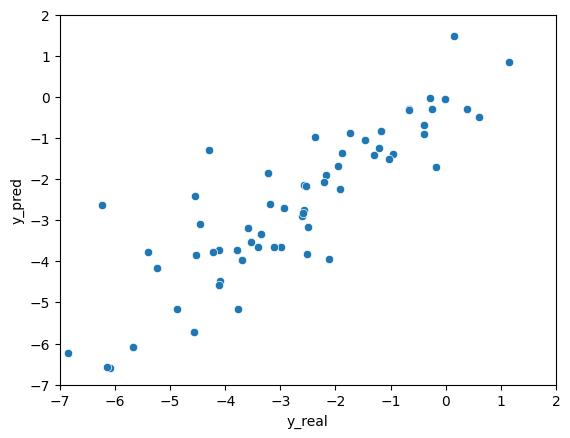

In [25]:
plt = sns.scatterplot(data=df, x="y_real", y="y_pred")
plt.set(xlim=(-7, 2))
plt.set(ylim=(-7, 2))
plt